### 导入所需库及配置项

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# 显示中文
plt.rcParams['font.family'] = 'SimHei'
plt.rcParams['axes.unicode_minus'] = False

### 读取示例数据集并可视化

In [2]:
# 读取 txt 文件
dataSet = np.loadtxt('testData.txt' , delimiter='\t')
dataSet[:5]

array([[ 1.658985,  4.285136],
       [-2.123337,  2.943366],
       [ 0.704199, -0.479481],
       [-0.39237 , -3.963704],
       [ 0.972564,  2.924086]])

In [3]:
dataSet.shape

(80, 2)

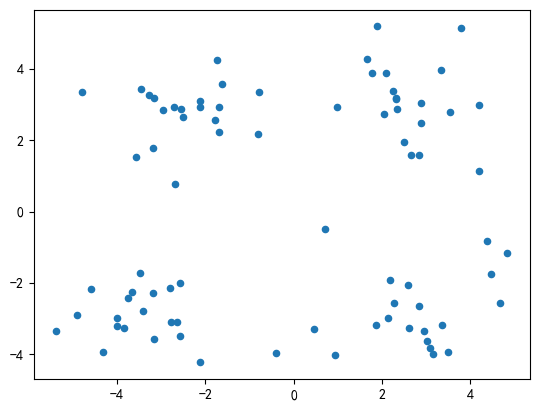

In [4]:
# 绘图
plt.scatter(dataSet[:,0] , dataSet[:,1] , s=20 )

### 定义功能函数

In [5]:
# 定义计算两个向量的欧式距离的函数
def euclidean_distance(vecA, vecB):
    return np.sqrt(sum(pow(vecA - vecB, 2)))

In [6]:
# 定义质心初始化函数
def centroids_init(dataSet , k):
    """
    质心初始化函数
    Parameters，参数说明:
    dataSet：数据集
    k:簇的数目
    输出：
    centroids：簇的质心矩阵
    """
    # 数据的特征维度数目
    n = dataSet.shape[1]
    # 创建一个全零的数组
    centroids = np.zeros((k,n))
    for j in range(n):
        # 计算每个特征维度的的最小值
        minJ = min(dataSet[:,j])
        # 每个特征维度最大值 - 最小值
        rangeJ = max(dataSet[:,j]) - min(dataSet[:,j])
        # 在整个数据集的边界范围内，创建随机质心
        centroids[:,j] = minJ + rangeJ*np.random.rand(k,)
    return centroids

### K-means算法实现

#### 按照“计算质心-分配簇-重新计算”的流程反复迭代，直到所有数据点的簇分配结果不在改变为止

In [7]:
def kMeans(dataSet, k, calculatedists=euclidean_distance, createCent=centroids_init):
    """
    输入：
    dataSet：数据集
    k:簇的数目
    calculatedists:计算距离的函数
    createCent:创建初始簇质心的函数
    输出：
    """
    m = dataSet.shape[0]
    # 存储每个点的簇分配结果（第一列）以及与簇质心间的距离（第二列）
    clusterAssment = np.zeros((m,2))
    # 生成初始簇质心
    centroids = createCent(dataSet,k)
    
    clusterChange = True
    while clusterChange:
        clusterChange = False
        for i in range(m):
            minDist = np.inf
            minIndex = -1
            for j in range(k):
                distJI = calculatedists(centroids[j,:] , dataSet[i,:])
                if distJI < minDist:
                    minDist = distJI
                    minIndex = j
            if clusterAssment[i,0] != minIndex:clusterChange = True
            clusterAssment[i,:] = minIndex , minDist**2
        print(centroids)
        for cent in range(k):
            # 获取每个簇包含的所有点
            ptsInClust = dataSet[clusterAssment[:,0] == cent]
            # 计算每个簇的数据点的平均值，并将其作为新的簇中心点
            centroids[cent,:] = np.mean(ptsInClust, axis=0)
    return centroids, clusterAssment

### 可视化聚类结果

In [8]:
centroids, clusterAssment = kMeans(dataSet, 4)

[[ 2.1805388  -2.64507008]
 [ 1.71299912  3.87954526]
 [ 0.83111674 -1.77662496]
 [-1.61448504 -3.51645189]]
[[ 3.05021133 -2.82492178]
 [ 0.25122803  3.04222063]
 [-0.508066   -0.99886033]
 [-3.3912061  -2.7340531 ]]
[[ 3.11052774 -2.61694289]
 [ 0.14460654  3.09399208]
 [-1.0968974  -1.0857348 ]
 [-3.53973889 -2.89384326]]
[[ 3.11052774 -2.61694289]
 [ 0.23721978  3.13048439]
 [-1.4456595  -0.6080675 ]
 [-3.53973889 -2.89384326]]
[[ 2.97753205 -2.6512067 ]
 [ 0.23721978  3.13048439]
 [-2.18305025  0.9043795 ]
 [-3.38237045 -2.9473363 ]]
[[ 2.8692781  -2.54779119]
 [ 1.73775604  3.222066  ]
 [-2.84017553  2.6309902 ]
 [-3.38237045 -2.9473363 ]]
[[ 2.80293085 -2.7315146 ]
 [ 2.6265299   3.10868015]
 [-2.46154315  2.78737555]
 [-3.38237045 -2.9473363 ]]


In [9]:
centroids

array([[ 2.80293085, -2.7315146 ],
       [ 2.6265299 ,  3.10868015],
       [-2.46154315,  2.78737555],
       [-3.38237045, -2.9473363 ]])

In [10]:
clusterAssment

array([[1.00000000e+00, 2.32019150e+00],
       [2.00000000e+00, 1.38716420e-01],
       [0.00000000e+00, 9.47633071e+00],
       [3.00000000e+00, 9.97310599e+00],
       [1.00000000e+00, 2.76967820e+00],
       [1.00000000e+00, 4.55502856e-01],
       [1.00000000e+00, 9.32523506e-02],
       [2.00000000e+00, 9.13705455e-01],
       [0.00000000e+00, 1.25766593e+00],
       [3.00000000e+00, 4.09563895e-01],
       [1.00000000e+00, 9.46987842e-01],
       [2.00000000e+00, 2.63836399e+00],
       [0.00000000e+00, 5.20371222e-01],
       [3.00000000e+00, 1.86796790e+00],
       [2.00000000e+00, 2.80101213e+00],
       [0.00000000e+00, 5.85909807e+00],
       [2.00000000e+00, 1.39004893e+00],
       [3.00000000e+00, 1.50646425e+00],
       [1.00000000e+00, 2.29348924e+00],
       [2.00000000e+00, 6.45967483e-01],
       [0.00000000e+00, 1.74010499e+00],
       [0.00000000e+00, 6.63839104e+00],
       [3.00000000e+00, 3.77769471e-01],
       [1.00000000e+00, 2.51695402e+00],
       [1.000000

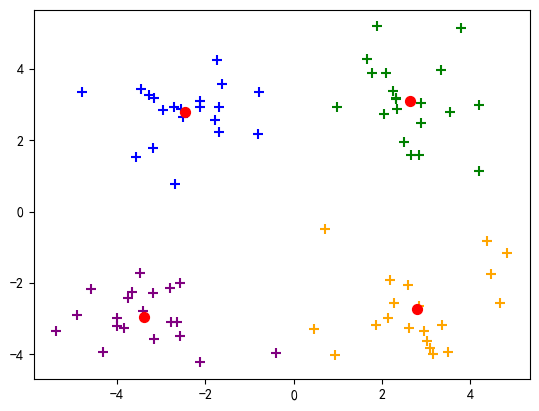

In [11]:
color = ["orange" , "green" , "blue" , "purple"]
m = dataSet.shape[0]

# 根据簇类别分别可视化原数据点
for i in range(m):
    if clusterAssment[i,0] == 0:
        plt.scatter(dataSet[i,0] , dataSet[i,1] , marker="+" , s=50 , color=color[0])
    if clusterAssment[i,0] == 1:
        plt.scatter(dataSet[i,0] , dataSet[i,1] , marker="+" , s=50 , color=color[1])
    if clusterAssment[i,0] == 2:
        plt.scatter(dataSet[i,0] , dataSet[i,1] , marker="+" , s=50 , color=color[2])
    if clusterAssment[i,0] == 3:
        plt.scatter(dataSet[i,0] , dataSet[i,1] , marker="+" , s=50 , color=color[3])

# 可视化最终簇质心点
for i in range(4):
    plt.scatter(centroids[i,0] , centroids[i,1] , marker="o" , s=50 , color="red")